# Carga de Dataset directamente desde Kaggle

In [ ]:
import json

api_token = {"username":"jhonjanertorres",
             "key":"b0d4402c36d56f51ce9c0f9de14104c8"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### El dataset que fue elegido para el proyecto fue:
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

In [ ]:
!kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022

100% 546M/546M [00:03<00:00, 230MB/s]
100% 546M/546M [00:03<00:00, 153MB/s]


In [ ]:
import zipfile
archivo_zip = '/content/bank-account-fraud-dataset-neurips-2022.zip'

with zipfile.ZipFile(archivo_zip,'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)

Base.csv
Variant I.csv
Variant II.csv
Variant III.csv
Variant IV.csv
Variant V.csv


In [ ]:
import pandas as pd
import plotly as pl
import cufflinks as cf

nombre_archivo_csv = 'Base.csv'

with zipfile.ZipFile(archivo_zip,'r') as zip_file:
  with zip_file.open(nombre_archivo_csv) as archivo_csv:
    df = pd.read_csv(archivo_csv)

In [ ]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [ ]:
df.dtypes.value_counts()

int64      18
float64     9
object      5
dtype: int64

# Limpieza de Dataset
Agregación manual del 5% de datos faltantes en al menos 3 de las columnas

Calculamos porcentaje de datos faltantes de cada columna actualmente:

In [ ]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

fraud_bool                          0.0
income                              0.0
name_email_similarity               0.0
prev_address_months_count           0.0
current_address_months_count        0.0
customer_age                        0.0
days_since_request                  0.0
intended_balcon_amount              0.0
payment_type                        0.0
zip_count_4w                        0.0
velocity_6h                         0.0
velocity_24h                        0.0
velocity_4w                         0.0
bank_branch_count_8w                0.0
date_of_birth_distinct_emails_4w    0.0
employment_status                   0.0
credit_risk_score                   0.0
email_is_free                       0.0
housing_status                      0.0
phone_home_valid                    0.0
phone_mobile_valid                  0.0
bank_months_count                   0.0
has_other_cards                     0.0
proposed_credit_limit               0.0
foreign_request                     0.0


In [ ]:
import numpy as np

# Define una lista de columnas en las que deseas introducir valores faltantes
columnas = np.random.choice(range(df.shape[1]-1),3)
columnas_a_modificar = [df.columns[columnas[0]], df.columns[columnas[1]], df.columns[columnas[2]]]

# Calcula el número de filas a modificar para alcanzar el 5% de valores faltantes
numero_filas_a_modificar = int(len(df) * 0.05 / len(columnas_a_modificar))

# Selecciona aleatoriamente las filas y columnas a modificar
filas_a_modificar = np.random.choice(df.index, size=numero_filas_a_modificar)
columnas_a_modificar = np.random.choice(columnas_a_modificar, size=numero_filas_a_modificar)

# Introduce valores faltantes en las filas y columnas seleccionadas
for fila, columna in zip(filas_a_modificar, columnas_a_modificar):
    df.loc[fila, columna] = None


Ahora realizamos la limpieza de los datos faltantes en el Dataset

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

# EDA - Exploración de Datos

### Revisamos las filas y columnas de nuestro Dataframe.

In [ ]:
df.shape

(983485, 32)

### Columnas del Dataframe con sus respectivos **Tipos de datos**

In [ ]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                    float64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [ ]:
df.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7


In [ ]:
df.tail(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999999,0,0.2,0.697452,-1,321,20,2.655916,9.908499,AA,951,...,0,200.0,0,INTERNET,6.717022,linux,0,1,0,4


Descripción general de las variables numéricas


In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,983485.000000,983485.000000,983485.000000,983485.000000,983485.000000,983485.000000,9.834850e+05,983485.000000,983485.000000,983485.000000,...,983485.000000,983485.000000,983485.000000,983485.000000,983485.000000,983485.000000,983485.000000,983485.000000,983485.0,983485.000000
mean,0.011029,0.562733,0.493683,16.715386,86.566181,33.689451,1.026498e+00,8.659722,1572.632176,5665.213700,...,0.889688,10.843011,0.222935,515.785599,0.025243,7.546231,0.576901,1.018311,0.0,3.288863
std,0.104439,0.290342,0.289142,44.042370,88.390091,12.024710,5.384524e+00,20.233407,1005.242991,3009.203653,...,0.313278,12.118356,0.416215,487.487361,0.156862,8.034266,0.494051,0.180790,0.0,2.209878
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225226,-1.000000,19.000000,20.000000,7.191467e-03,-1.181483,894.000000,3436.574359,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103461,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492139,-1.000000,52.000000,30.000000,1.517484e-02,-0.830523,1263.000000,5319.662199,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114860,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755607,12.000000,130.000000,40.000000,2.633514e-02,4.965913,1944.000000,7680.735249,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.867825,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### EDA usando Dtale

Esta librería nos proporciona una manera más fácil de interactuar con nuestro dataframe

In [ ]:
!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
dtale.show(df)

/usr/local/lib/python3.10/dist-packages/dtale/views.py:785: FutureWarning:

['housing_status', 'device_os'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



https://v9prx06al78-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [ ]:
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='ggplot',offline=True) # write cf.getThemes() to find all themes available

### Analisis de Variables y algunas relaciones

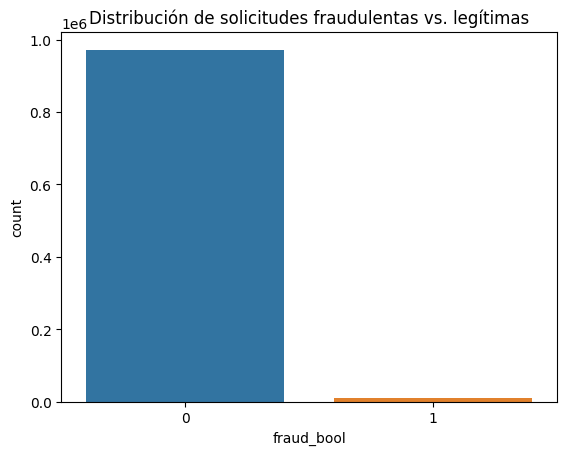

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable objetivo
sns.countplot(data=df, x="fraud_bool")
plt.title("Distribución de solicitudes fraudulentas vs. legítimas")
plt.show()

Variables  "income," "name_email_similarity," "customer_age,"

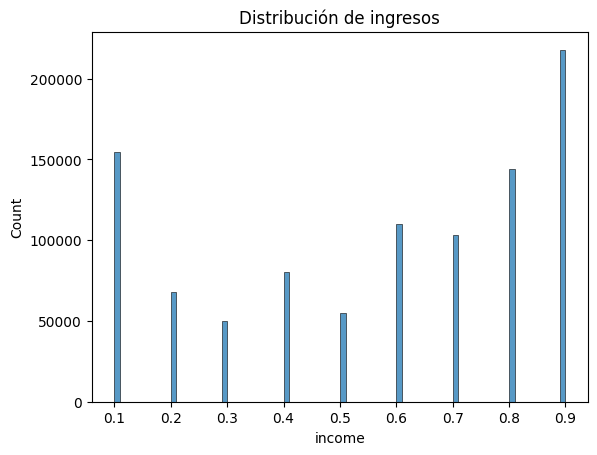

In [ ]:
# Ejemplo de visualización para la variable "income"
sns.histplot(data=df, x="income")
plt.title("Distribución de ingresos")
plt.show()

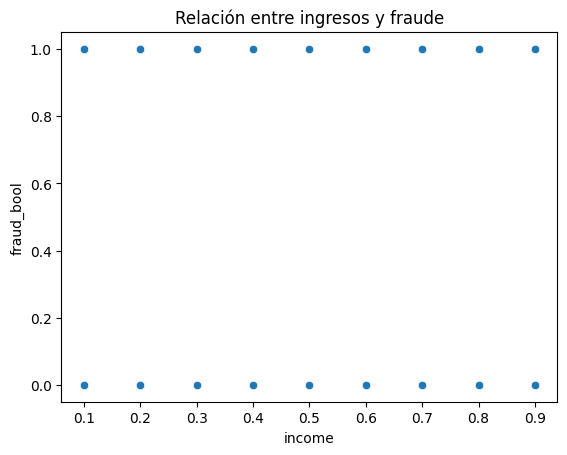

In [ ]:
# Ejemplo de un diagrama de dispersión para "income" vs. "fraud_bool"
sns.scatterplot(data=df, x="income", y="fraud_bool")
plt.title("Relación entre ingresos y fraude")
plt.show()

<ipython-input-77-4489bd545417>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



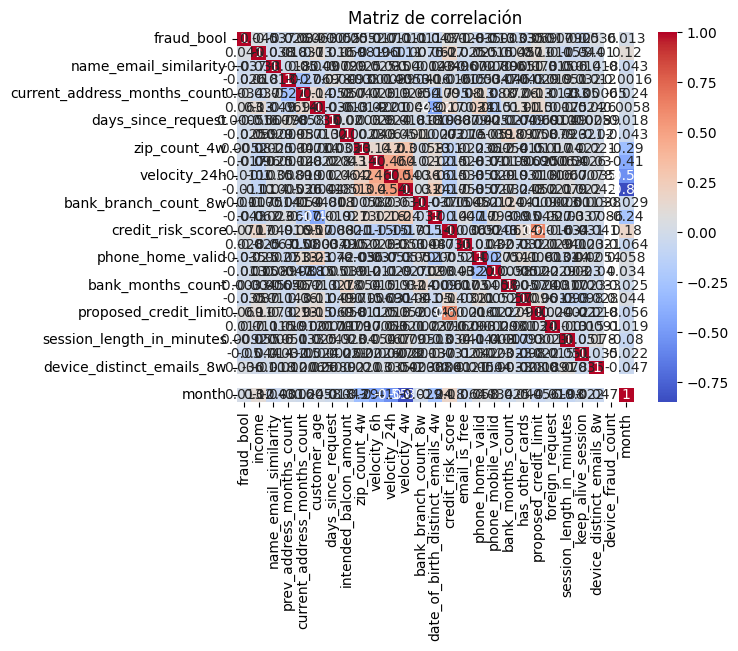

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación en un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

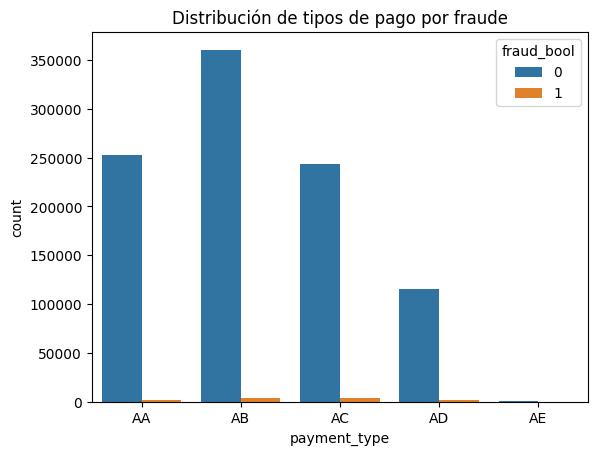

In [ ]:
# Ejemplo de un gráfico de barras para "payment_type" vs. "fraud_bool"
sns.countplot(data=df, x="payment_type", hue="fraud_bool")
plt.title("Distribución de tipos de pago por fraude")
plt.show()

En este ejemplo, hemos utilizado la columna "month" para crear una variable ficticia de fecha. Sin embargo, ten en cuenta que esta variable ficticia no representa fechas reales, por lo que cualquier análisis basado en ella será puramente para organizar los datos en una serie temporal.

In [ ]:
unique_months = df['month'].unique()
min_month = df['month'].min()
max_month = df['month'].max()

print("Valores Únicos en 'month':", unique_months)
print("Mínimo Valor en 'month':", min_month)
print("Máximo Valor en 'month':", max_month)


Valores Únicos en 'month': [7 3 2 1 6 0 5 4]
Mínimo Valor en 'month': 0
Máximo Valor en 'month': 7


In [ ]:
df['month'].value_counts()

3    148503
2    134706
0    130271
4    125628
1    125402
5    117388
6    106337
7     95250
Name: month, dtype: int64

In [ ]:
train = df[df['month'].between(0, 2)]
test = df[df['month'].between(3, 7)]


In [ ]:
train.shape
print("Train: ",train.shape)
print("Test: ",test.shape)

Train:  (390379, 32)
Test:  (593106, 32)


# Random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Dividir el conjunto de datos en X (características) e y (etiquetas)
X = df.drop(columns=['fraud_bool'])
y = df['fraud_bool']

# Realiza la codificación one-hot para todas las columnas categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba después de la codificación one-hot
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Calcular el recall (Sensibilidad)
recall = recall_score(y_test, y_pred)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print("Precisión (Accuracy):", accuracy)
print("Recall (Sensibilidad):", recall)
print("F1-Score:", f1)
print("Matriz de Confusión:")
print(conf_matrix)


Precisión (Accuracy): 0.9889983070407784
Recall (Sensibilidad): 0.0013863216266173752
F1-Score: 0.0027649769585253456
Matriz de Confusión:
[[194530      3]
 [  2161      3]]


## **Conclusiones (Random Forest)**

**Precisión (Accuracy):** La precisión del modelo es bastante alta, alcanzando un valor de aproximadamente 98.9%. Esto significa que la mayoría de las solicitudes de apertura de cuentas se clasificaron correctamente como fraudulentas o legítimas. Sin embargo, debemos tener en cuenta que el conjunto de datos puede estar desequilibrado, lo que puede dar una impresión exagerada de precisión.


**Recall (Sensibilidad):** El recall es bastante bajo, alrededor del 0.14%. Esto indica que el modelo solo logra detectar un pequeño porcentaje de las solicitudes de apertura de cuentas fraudulentas. Esto podría ser preocupante si el objetivo es capturar la mayoría de los casos de fraude.


**F1-Score:** El F1-Score es una métrica que combina la precisión y el recall. En este caso, el valor es muy bajo, alrededor del 0.28%. Esto sugiere un desequilibrio entre la capacidad del modelo para clasificar correctamente las solicitudes y su capacidad para detectar fraudes.


**Matriz de Confusión:** La matriz de confusión muestra que el modelo tiende a clasificar la mayoría de las solicitudes como legítimas (casi 200,000) y solo unas pocas como fraudulentas (alrededor de 2,161). Esto se refleja en el bajo recall, ya que muchas solicitudes de fraude no se detectan.

# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inicializar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

## Métricas de rendimiento

In [ ]:
# Calcular métricas de desempeño
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Precisión del modelo XGBoost:", accuracy_xgb)
print("Recall del modelo XGBoost:", recall_xgb)
print("F1-Score del modelo XGBoost:", f1_score_xgb)
print("Matriz de Confusión del modelo XGBoost:")
print(confusion_matrix_xgb)

Precisión del modelo XGBoost: 0.9887847806524757
Recall del modelo XGBoost: 0.03650646950092421
F1-Score del modelo XGBoost: 0.06683587140439931
Matriz de Confusión del modelo XGBoost:
[[194412    121]
 [  2085     79]]


## **Conclusiones (XGBoost)**

**Precisión del modelo XGBoost:** 0.9887847806524757: La precisión es muy alta, lo que significa que la mayoría de las solicitudes de apertura de cuentas se han clasificado correctamente como fraudulentas o legítimas. Sin embargo, dado que el conjunto de datos está desequilibrado, la precisión por sí sola no es suficiente para evaluar el rendimiento del modelo.


-

**Recall del modelo XGBoost:** 0.03650646950092421: El recall, o sensibilidad, es bastante bajo, lo que indica que el modelo no ha detectado correctamente la mayoría de las solicitudes de apertura de cuentas fraudulentas. Esto sugiere que el modelo tiene dificultades para identificar casos de fraude.

-

**F1-Score del modelo XGBoost:** 0.06683587140439931: El puntaje F1 es una combinación de precisión y recall. En este caso, también es bajo debido al bajo recall. El bajo puntaje F1 sugiere que el modelo no está equilibrando adecuadamente precisión y capacidad para detectar fraudes.

-

**Matriz de Confusión del modelo XGBoost:** La matriz de confusión muestra cómo se están clasificando las solicitudes. En este caso, el modelo ha clasificado la mayoría de las solicitudes como legítimas (194,412 verdaderos negativos) y ha identificado algunas como fraudulentas (79 verdaderos positivos). Sin embargo, también ha cometido errores al clasificar algunas solicitudes legítimas como fraudulentas (121 falsos positivos) y al no detectar muchas solicitudes fraudulentas (2085 falsos negativos).